In [45]:
#import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import scale
import sklearn.metrics as sm
from sklearn.metrics import confusion_matrix,classification_report
%matplotlib inline

In [48]:
airline=pd.read_excel("Downloads/Clustering (1)/Clustering/EastWestAirlines.xlsx",sheet_name="data")
#Exploratory Datasets
print("Total missing Values in the train dataset:",airline.isna().sum().sum())
#find duplicates in train dataset
print("No.of duplicate in train datasets:",end=" ")
print(airline.duplicated().sum()) 

Total missing Values in the train dataset: 0
No.of duplicate in train datasets: 0


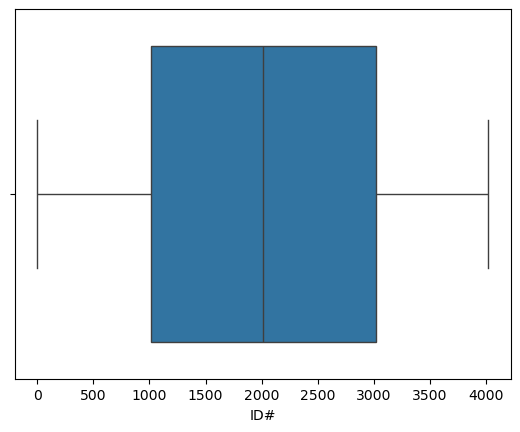

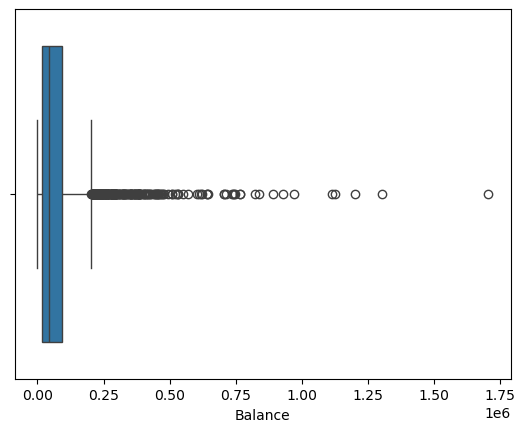

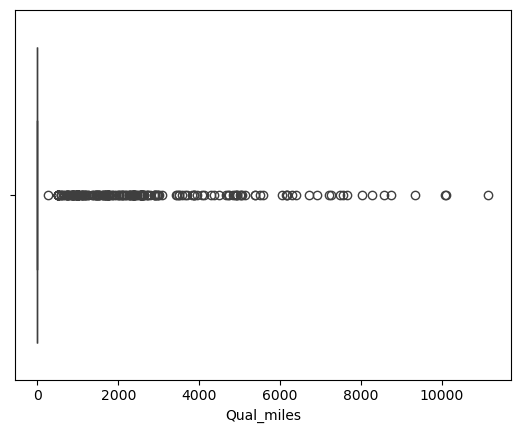

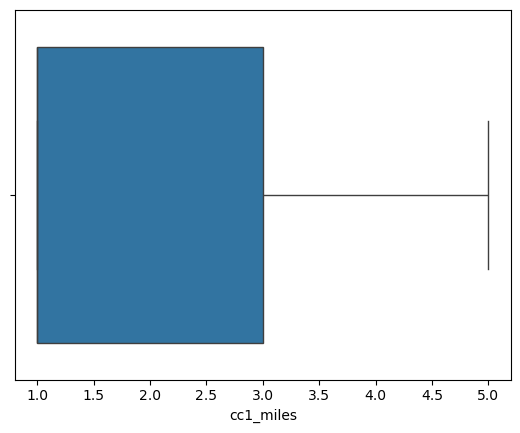

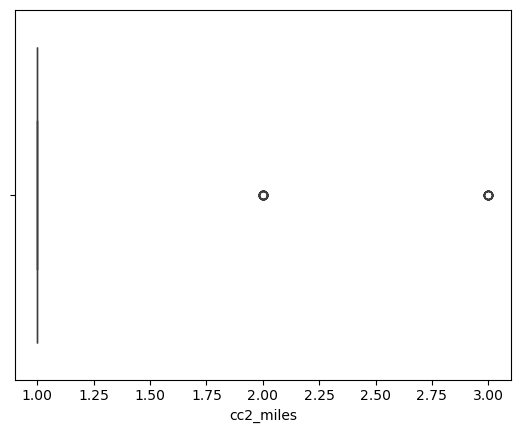

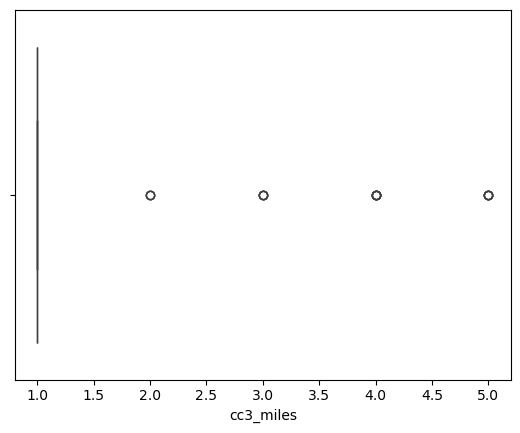

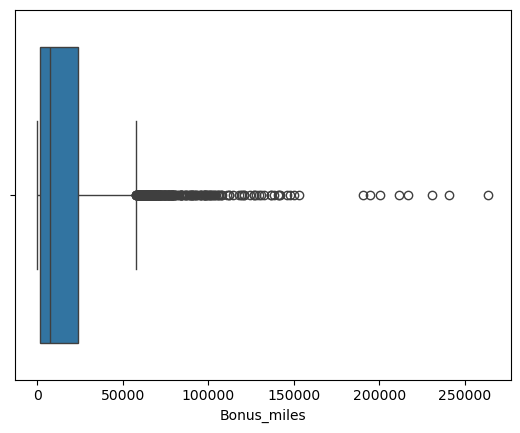

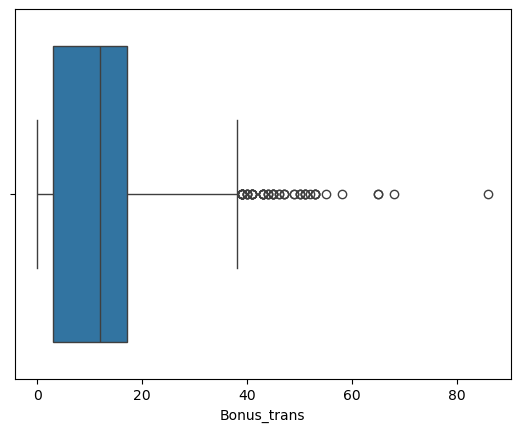

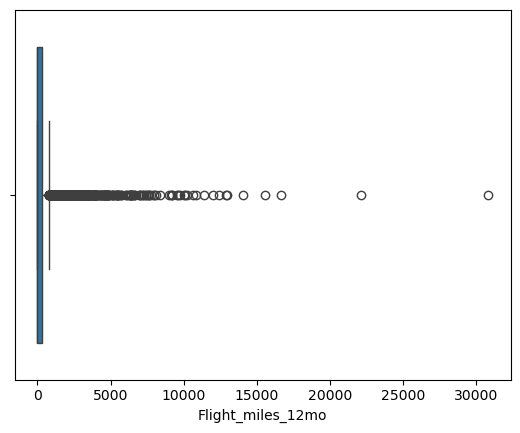

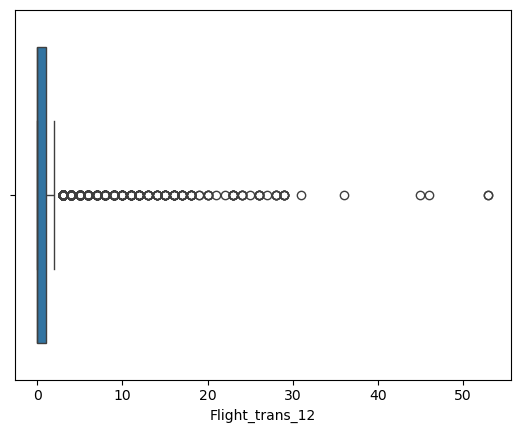

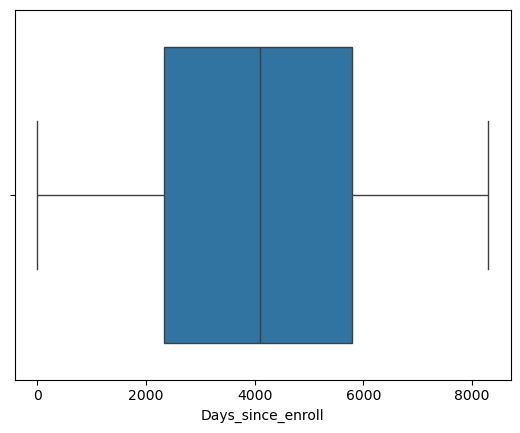

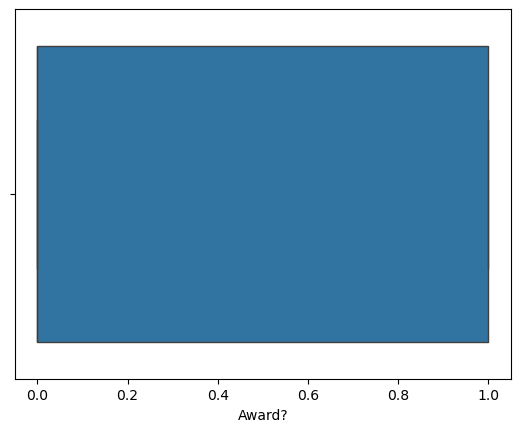

In [50]:
##Find outliers using boxplot for airline data
for i in airline.select_dtypes(include="number").columns:
    sns.boxplot(data=airline,x=i)
    plt.show()

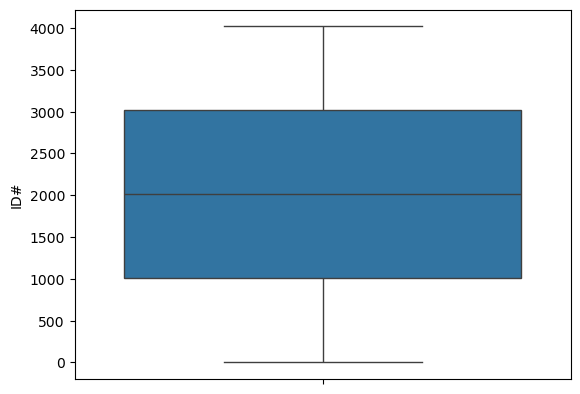

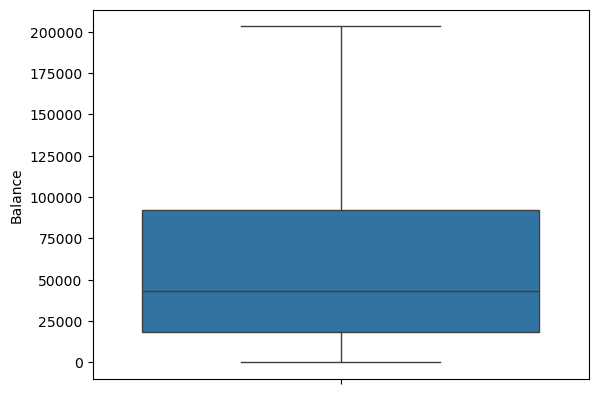

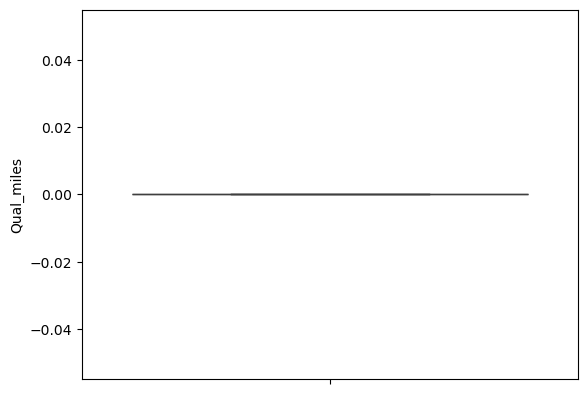

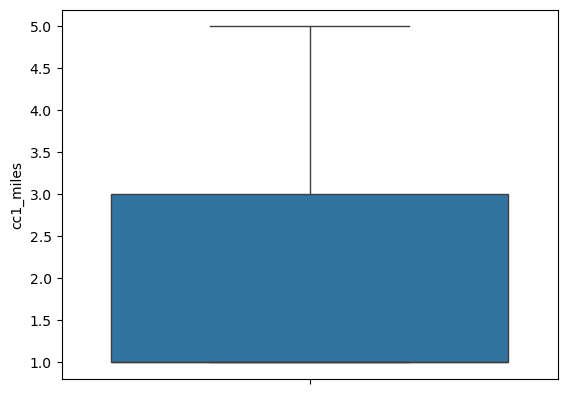

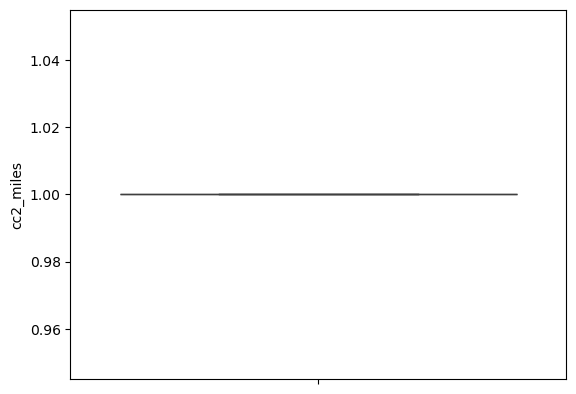

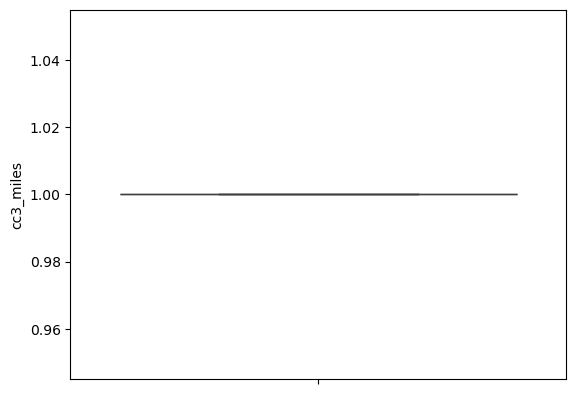

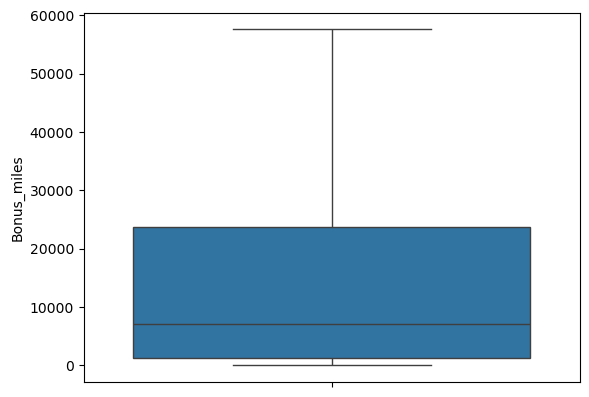

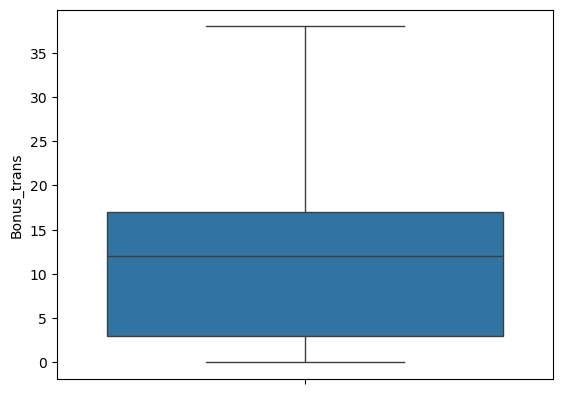

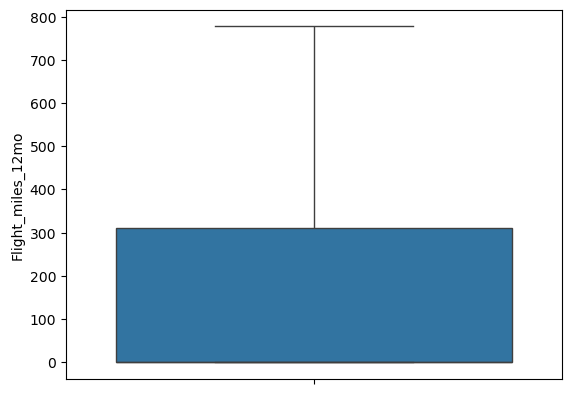

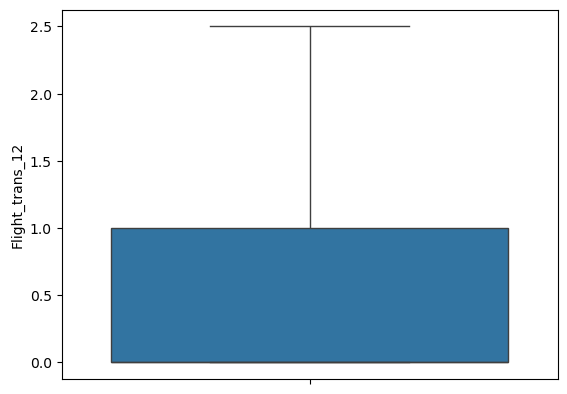

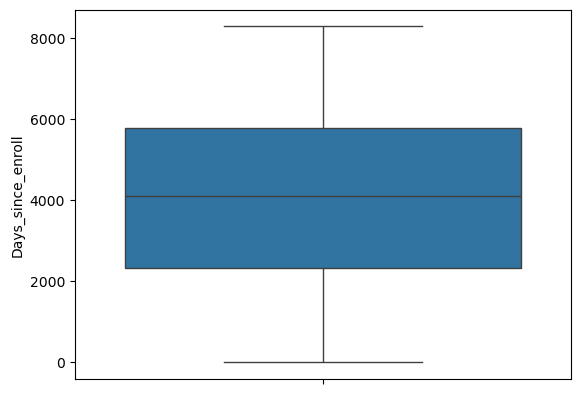

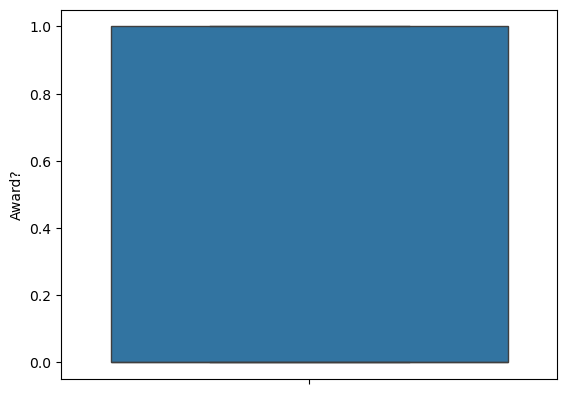

In [52]:
#Treatment for outliers/boxplot capping for airline data
def remove_outlier(col):
    q1,q3=np.percentile(col,[25,75])
    IQR=q3-q1
    lowerbound=q1-(1.5*(IQR))
    upperbound=q3+(1.5*(IQR))
    return lowerbound,upperbound
for i in airline.select_dtypes(include="number").columns:
    lower,upper=remove_outlier(airline[i])
    airline[i]=np.where(airline[i]<lower,lower,airline[i])
    airline[i]=np.where(airline[i]>upper,upper,airline[i])

#box plot after capping  train dataset
for i in airline.select_dtypes(include="number").columns:
    sns.boxplot(airline[i])
    plt.show()

In [40]:
print(airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID#                3999 non-null   float64
 1   Balance            3999 non-null   float64
 2   Qual_miles         3999 non-null   float64
 3   cc1_miles          3999 non-null   float64
 4   cc2_miles          3999 non-null   float64
 5   cc3_miles          3999 non-null   float64
 6   Bonus_miles        3999 non-null   float64
 7   Bonus_trans        3999 non-null   float64
 8   Flight_miles_12mo  3999 non-null   float64
 9   Flight_trans_12    3999 non-null   float64
 10  Days_since_enroll  3999 non-null   float64
 11  Award?             3999 non-null   float64
dtypes: float64(12)
memory usage: 375.0 KB
None


In [56]:
airline.rename(columns={"Days_since_enroll":"Enroll_days","Flight_miles_12mo":"Flight_miles","Flight_trans_12":"Flight_trans"},inplace=True)
print(airline.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID#           3999 non-null   float64
 1   Balance       3999 non-null   float64
 2   Qual_miles    3999 non-null   float64
 3   cc1_miles     3999 non-null   float64
 4   cc2_miles     3999 non-null   float64
 5   cc3_miles     3999 non-null   float64
 6   Bonus_miles   3999 non-null   float64
 7   Bonus_trans   3999 non-null   float64
 8   Flight_miles  3999 non-null   float64
 9   Flight_trans  3999 non-null   float64
 10  Enroll_days   3999 non-null   float64
 11  Award?        3999 non-null   float64
dtypes: float64(12)
memory usage: 375.0 KB
None


In [58]:
#summary stastistics
print(airline.describe())

               ID#        Balance  Qual_miles    cc1_miles  cc2_miles  \
count  3999.000000    3999.000000      3999.0  3999.000000     3999.0   
mean   2014.819455   63768.635784         0.0     2.059515        1.0   
std    1160.764358   58673.700736         0.0     1.376919        0.0   
min       1.000000       0.000000         0.0     1.000000        1.0   
25%    1010.500000   18527.500000         0.0     1.000000        1.0   
50%    2016.000000   43097.000000         0.0     1.000000        1.0   
75%    3020.500000   92404.000000         0.0     3.000000        1.0   
max    4021.000000  203218.750000         0.0     5.000000        1.0   

       cc3_miles   Bonus_miles  Bonus_trans  Flight_miles  Flight_trans  \
count     3999.0   3999.000000  3999.000000   3999.000000   3999.000000   
mean         1.0  15410.730683    11.470618    178.055639      0.591523   
std          0.0  18074.733482     9.115104    294.678028      0.944826   
min          1.0      0.000000     0.00000

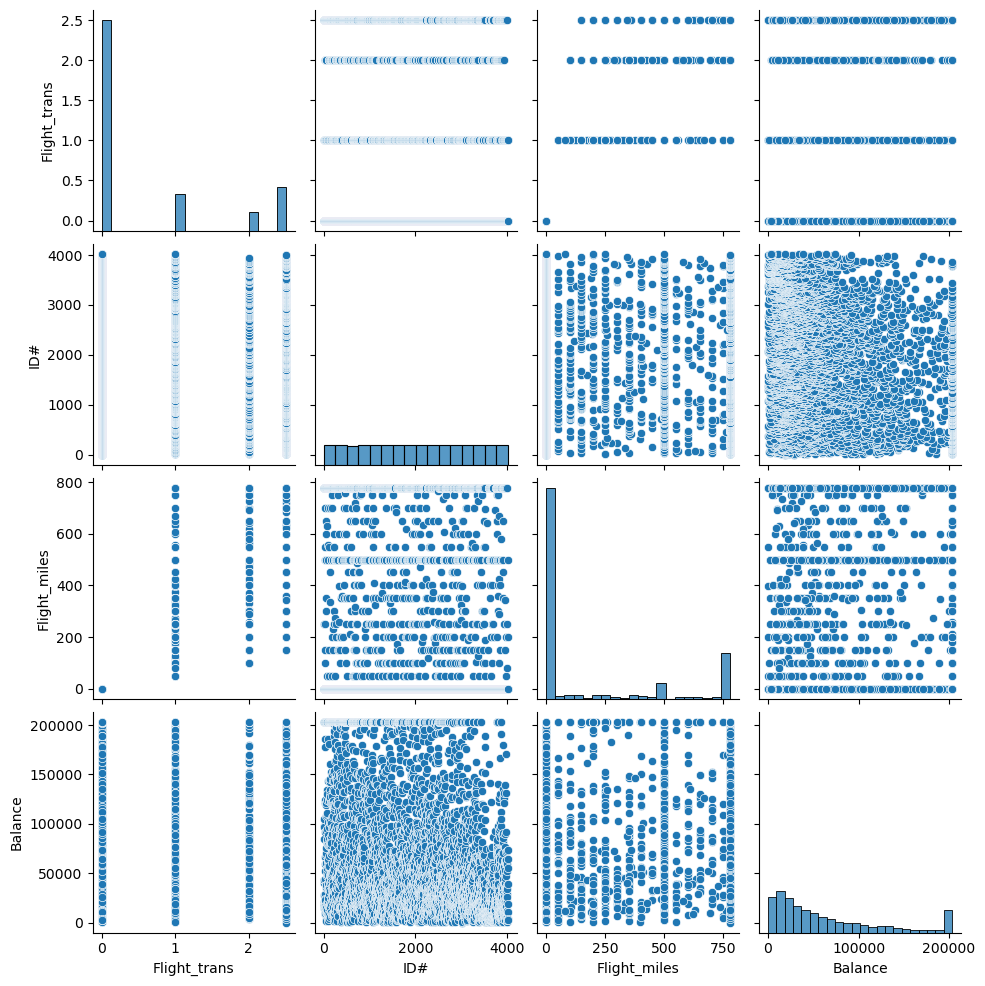

In [62]:
#plot pairplot
sns.pairplot(airline[["Flight_trans","ID#","Flight_miles","Balance"]])
plt.show()

In [90]:
import sklearn.cluster as cluster
kmeans=cluster.KMeans(n_clusters=3,init="k-means++")
kmeans=kmeans.fit(airline[["Enroll_days","Flight_miles"]])
kmeans.cluster_centers_

array([[6683.89109767,  207.02160761],
       [1865.9887798 ,  147.29032258],
       [4290.93008475,  185.3704096 ]])

In [92]:
#Attach cluster to oeiginal data
airline["Cluster"]=kmeans.labels_
airline["Cluster"].value_counts()

Cluster
1    1423
2    1416
0    1160
Name: count, dtype: int64

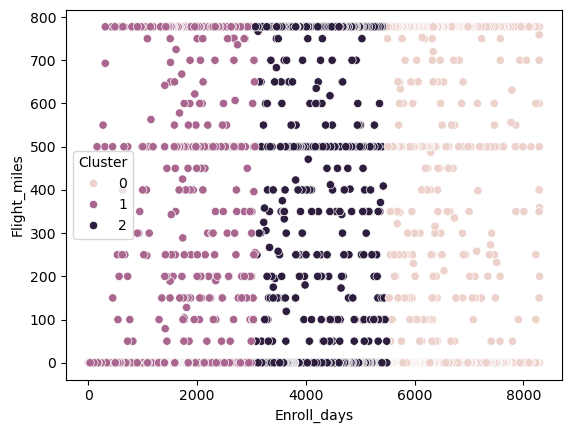

In [94]:
#plot cluster
sns.scatterplot(x="Enroll_days",y="Flight_miles",hue="Cluster",data=airline)
plt.show()

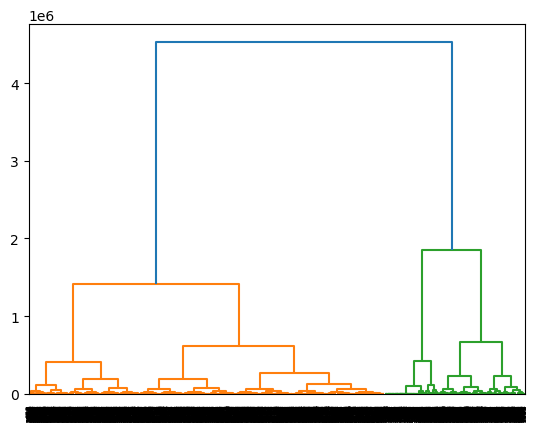

In [102]:
#hierarichical clustering
x=airline.iloc[:,[1,7]].values
import scipy.cluster.hierarchy as sch
dendrogram=sch.dendrogram(sch.linkage(x,method="ward"))

In [134]:
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=3,linkage="ward")
y_hc=hc.fit_predict(x)

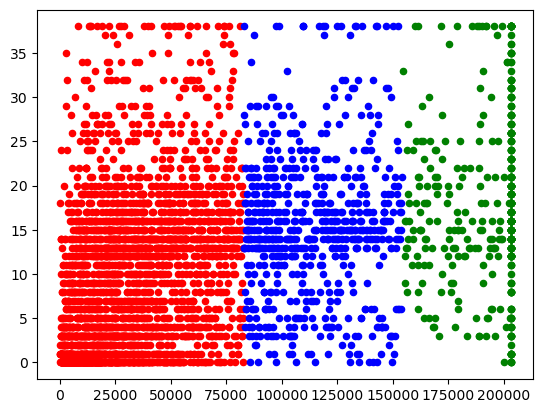

In [138]:
plt.scatter(x[y_hc==0,0],x[y_hc==0,1],s=20,c="red",label="cluster1")
plt.scatter(x[y_hc==1,0],x[y_hc==1,1],s=20,c="blue",label="cluster2")
plt.scatter(x[y_hc==2,0],x[y_hc==2,1],s=20,c="green",label="cluster3")
plt.show()

In [148]:
#DBSCAN cluster algorithm
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=5,min_samples=5)
labels1=dbscan.fit_predict(x)
np.unique(labels1)

array([-1,  0,  1,  2,  3], dtype=int64)

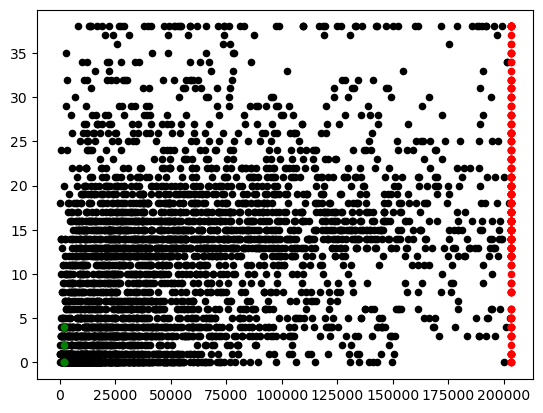

In [154]:
plt.scatter(x[labels1==-1,0],x[labels1==-1,1],s=20,c="black")
plt.scatter(x[labels1==0,0],x[labels1==0,1],s=20,c="red")
plt.scatter(x[labels1==1,0],x[labels1==1,1],s=20,c="green")
plt.show()